In [ ]:
# https://www.kaggle.com/datasets/vetrirah/customer/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('../data/segmentation/Train.csv')
test = pd.read_csv('../data/segmentation/Test.csv')
train['Test'] = 0
test['Test'] = 1

df = pd.concat((train, test), axis=0)

In [3]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,0


In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0


In [5]:
train.shape, df.shape

((8068, 12), (10695, 12))

In [6]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,0


In [7]:
df.describe()

,ID,Age,Work_Experience,Family_Size,Test
count,10695.000000,10695.000000,9597.000000,10247.000000,10695.000000
mean,463468.088640,43.511828,2.619777,2.844052,0.245629
std,2600.966411,16.774158,3.390790,1.536427,0.430480
min,458982.000000,18.000000,0.000000,1.000000,0.000000
25%,461220.500000,30.000000,0.000000,2.000000,0.000000
50%,463451.000000,41.000000,1.000000,3.000000,0.000000
75%,465733.500000,53.000000,4.000000,4.000000,0.000000
max,467974.000000,89.000000,14.000000,9.000000,1.000000


In [8]:
df.describe(include=np.object_)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,10695,10505,10593,10533,10695,10587,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,5841,6163,6570,3318,6494,6910,2268


<Axes: xlabel='Age', ylabel='Count'>

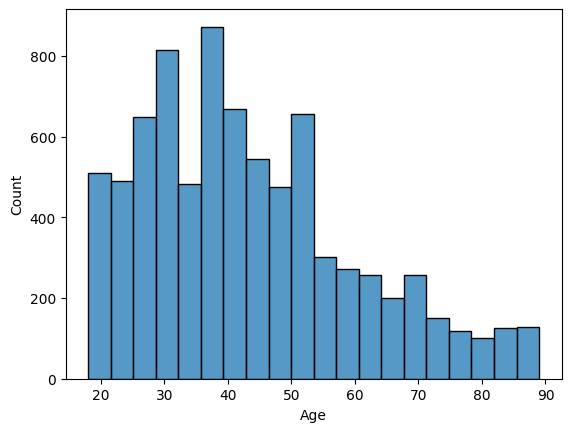

In [9]:
sns.histplot(data=train, x='Age', bins=20)
# plt.hist(x=np.log(train.Age))

<Axes: xlabel='Work_Experience', ylabel='Count'>

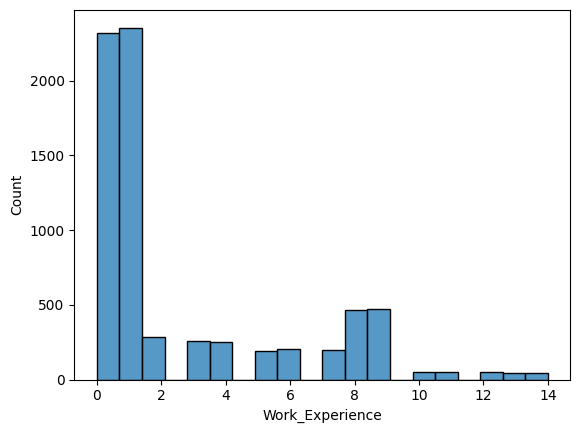

In [10]:
sns.histplot(data=train, x='Work_Experience', bins=20)

In [11]:
df.Var_1 = df.Var_1.fillna(train.Var_1.mode().tolist()[0])
df.Graduated = df.Graduated.fillna(train.Graduated.mode().tolist()[0])
df.Profession = df.Profession.fillna(train.Profession.mode().tolist()[0])
df.Family_Size = df.Family_Size.fillna(train.Family_Size.mode().tolist()[0])
df.Ever_Married = df.Ever_Married.fillna(train.Ever_Married.mode().tolist()[0])

In [12]:
train \
    .groupby(['Graduated', 'Profession']) \
    .agg({'Work_Experience': pd.Series.median}) \
    .reset_index()


,Graduated,Profession,Work_Experience
0,No,Artist,1.0
1,No,Doctor,1.0
2,No,Engineer,1.0
3,No,Entertainment,1.0
4,No,Executive,1.0
5,No,Healthcare,1.0
6,No,Homemaker,8.0
7,No,Lawyer,1.0
8,No,Marketing,1.0
9,Yes,Artist,1.0


In [13]:
df.loc[(df.Work_Experience.isna()) & (df.Profession == 'Homemaker'), ['Work_Experience']] = 8
df.loc[(df.Work_Experience.isna()) & (df.Profession != 'Homemaker'), ['Work_Experience']] = 1

In [14]:
df[(df.Work_Experience.isna()) & (df.Profession == 'Homemaker')].Work_Experience

Series([], Name: Work_Experience, dtype: float64)

In [15]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,0


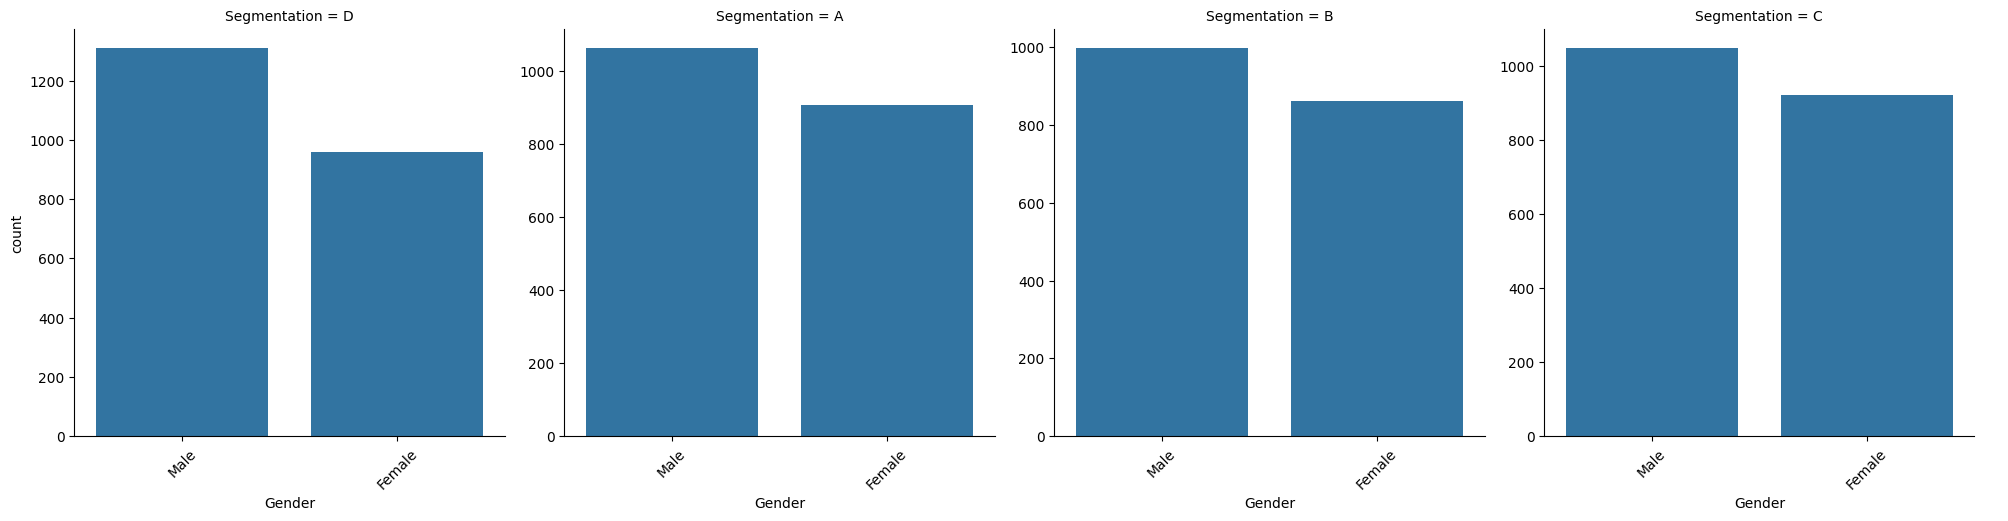

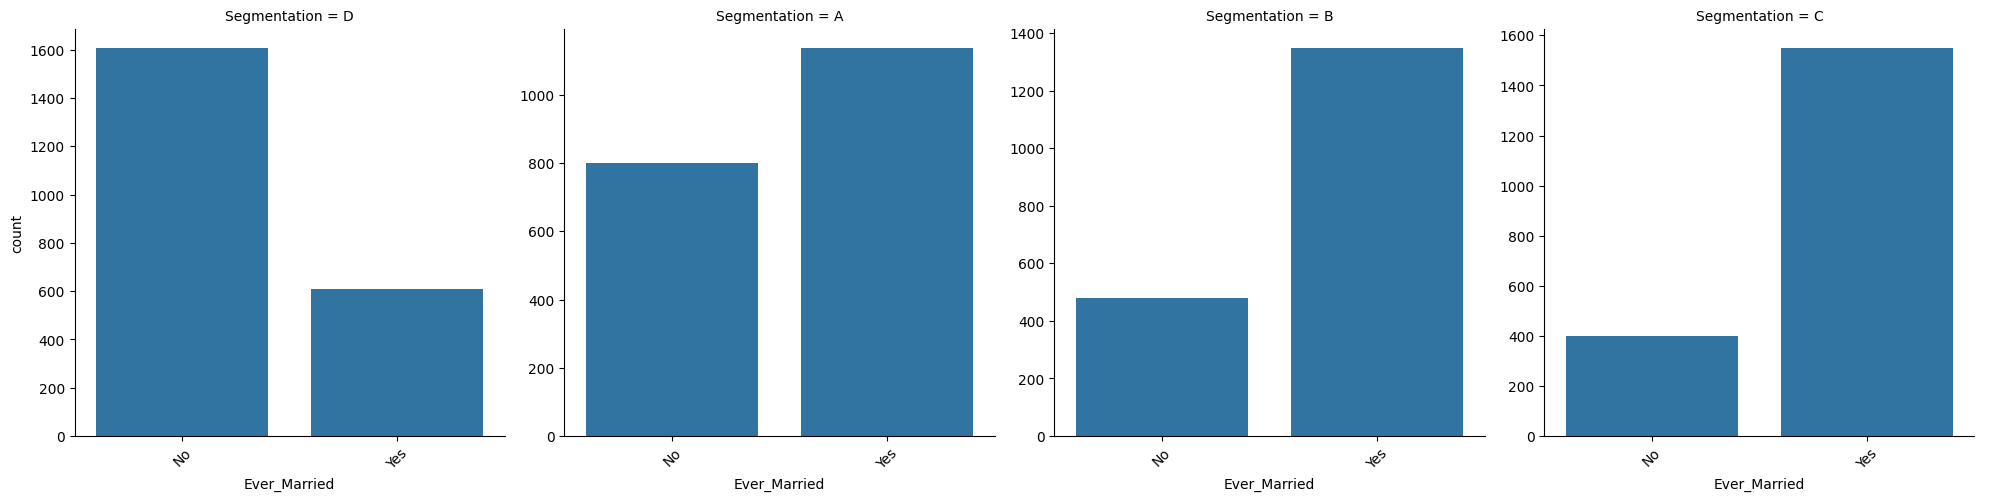

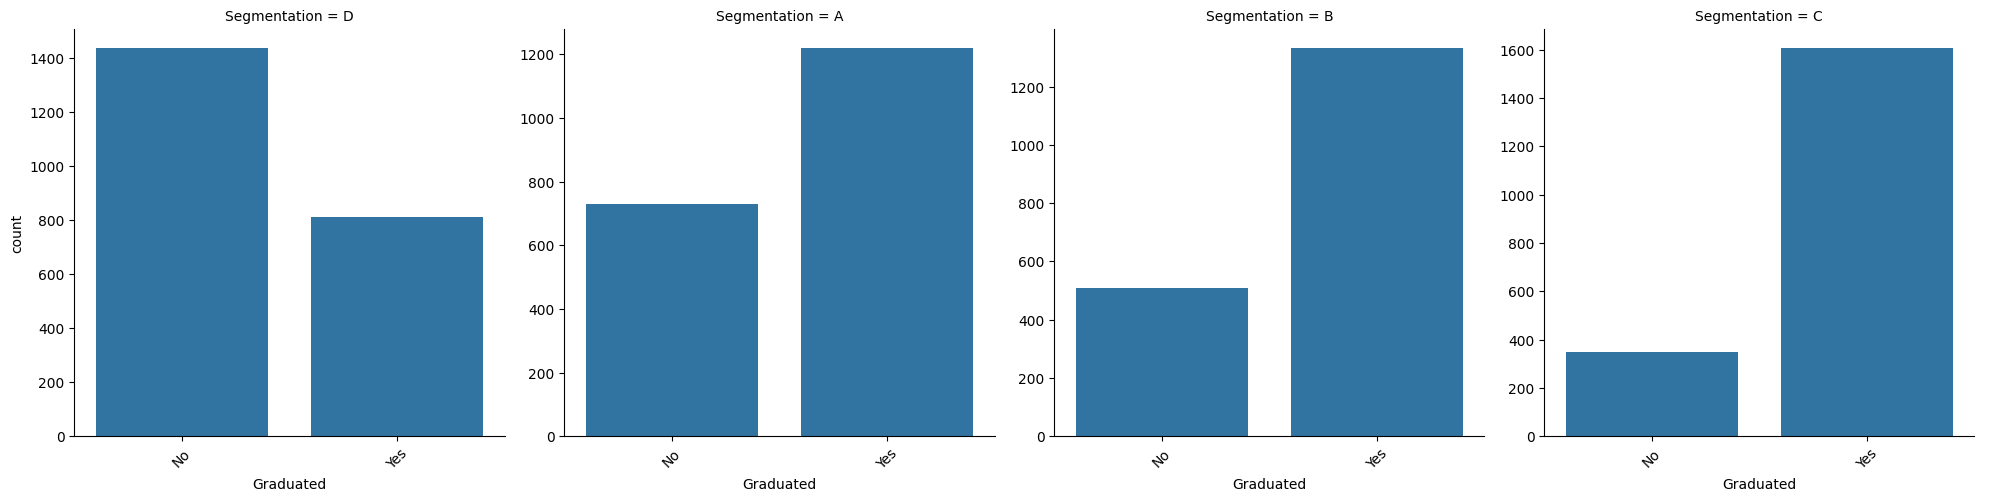

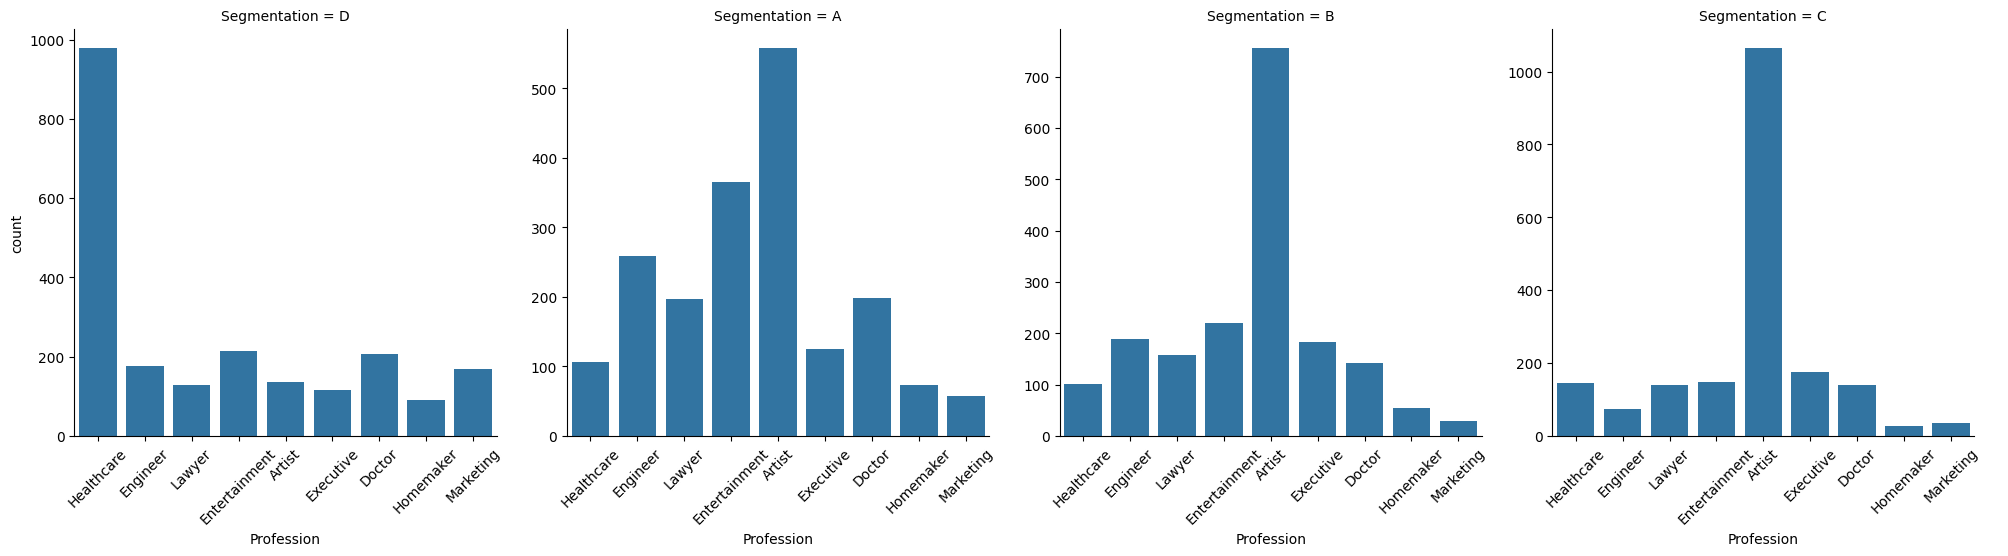

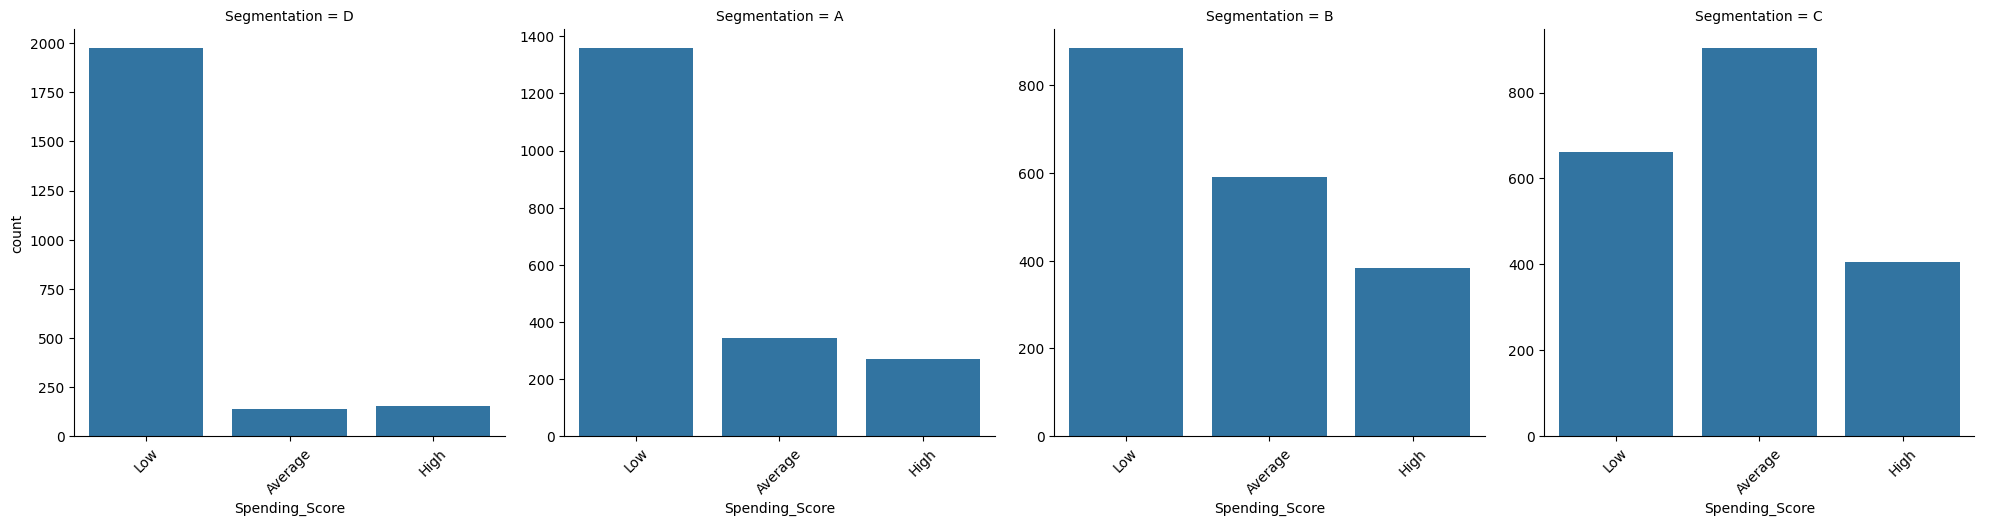

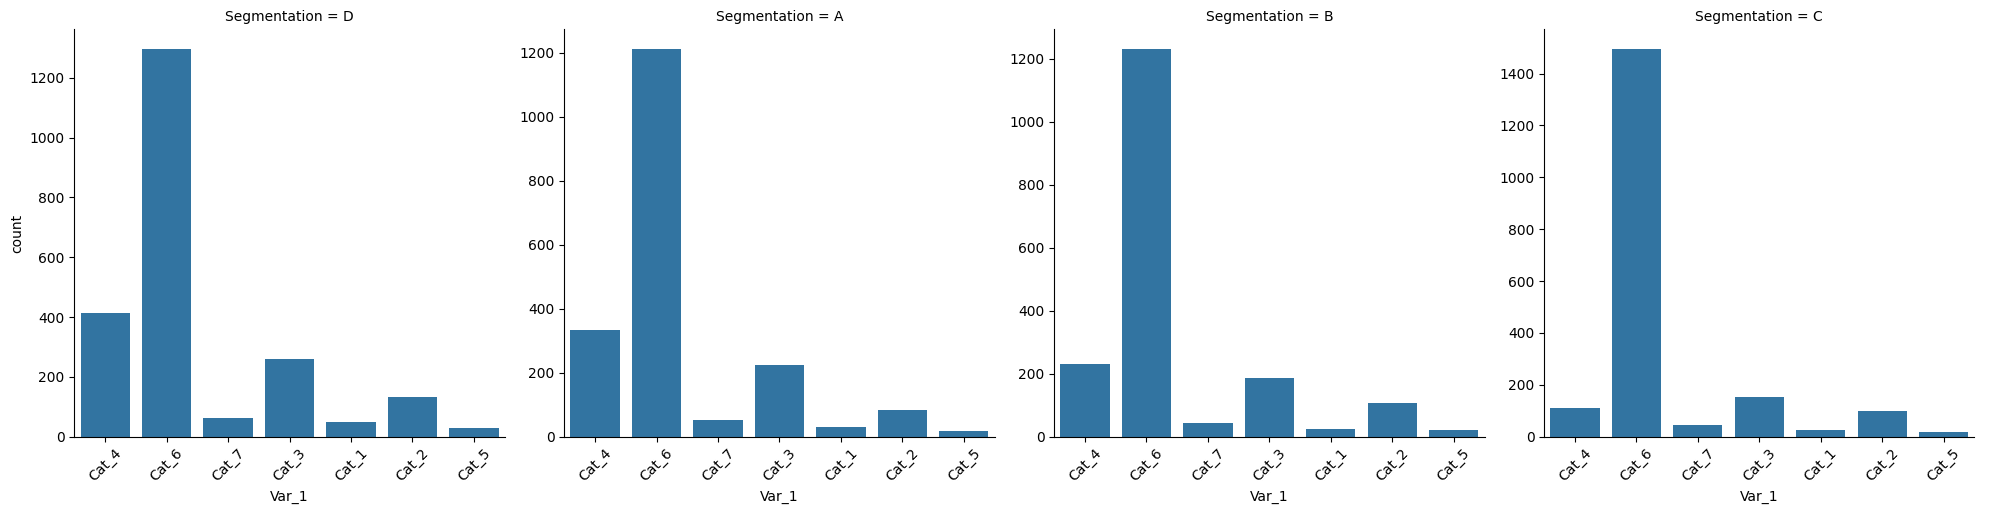

In [16]:
categorical_features = train.drop(columns=['Test', 'Segmentation']).select_dtypes(include=np.object_).columns.to_list()
for feature in categorical_features:
    ax = sns.catplot(data=train, x=feature, col='Segmentation', kind='count', sharey=False)
    ax.set_xticklabels(rotation=45)

In [17]:
def mean_target_endcode(df, category, target):
    df = df[[category, target, 'Test']].copy()
    dum =  pd.get_dummies(data=df[target], prefix=category, drop_first=True)
    df = pd.concat((df, dum), axis=1)
    for col in dum.columns:
        df[col] = df[df.Test == 0].groupby(category)[col].transform('mean')
    return df.drop(columns=[category, target, 'Test'])

In [18]:
for col in ['Var_1', 'Profession']:
    df = pd.concat((df, mean_target_endcode(df, col, 'Segmentation')), axis=1).drop(columns=col)

In [19]:
df

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Test,Var_1_B,Var_1_C,Var_1_D,Profession_B,Profession_C,Profession_D
0,462809,Male,No,22,No,1.0,Low,4.0,D,0,0.213039,0.100092,0.381084,0.075826,0.109610,0.734985
1,462643,Female,Yes,38,Yes,1.0,Average,3.0,A,0,0.213039,0.100092,0.381084,0.270386,0.107296,0.251788
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,B,0,0.234287,0.285472,0.248400,0.270386,0.107296,0.251788
3,461735,Male,Yes,67,Yes,0.0,High,2.0,B,0,0.234287,0.285472,0.248400,0.253612,0.224719,0.205457
4,462669,Female,Yes,40,Yes,1.0,High,6.0,A,0,0.234287,0.285472,0.248400,0.232877,0.155954,0.226554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,9.0,Low,4.0,NaN,1,0.234287,0.285472,0.248400,0.294697,0.410227,0.071212
2623,467958,Female,No,35,Yes,1.0,Low,1.0,NaN,1,0.226277,0.187348,0.315085,0.294697,0.410227,0.071212
2624,467960,Female,No,53,Yes,1.0,Low,2.0,NaN,1,0.234287,0.285472,0.248400,0.305509,0.292154,0.193656
2625,467961,Male,Yes,47,Yes,1.0,High,5.0,NaN,1,0.234287,0.285472,0.248400,0.232877,0.155954,0.226554


In [20]:
train = df[df.Test==0].drop(columns='Test')
train.drop(columns='ID', inplace=True)

test = df[df.Test==1].drop(columns='Test')
train.shape, test.shape, df.shape

((8068, 14), (2627, 15), (10695, 16))

In [21]:
X_train = train.drop(columns='Segmentation')
y_train = train['Segmentation']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=1233, test_size=0.1)
X_test = test.drop(columns='Segmentation')

In [22]:
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = X_train.select_dtypes(include=np.object_).columns.to_list()
numeric_features, categorical_features


(['Age', 'Work_Experience', 'Family_Size'],
 ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score'])

<Axes: >

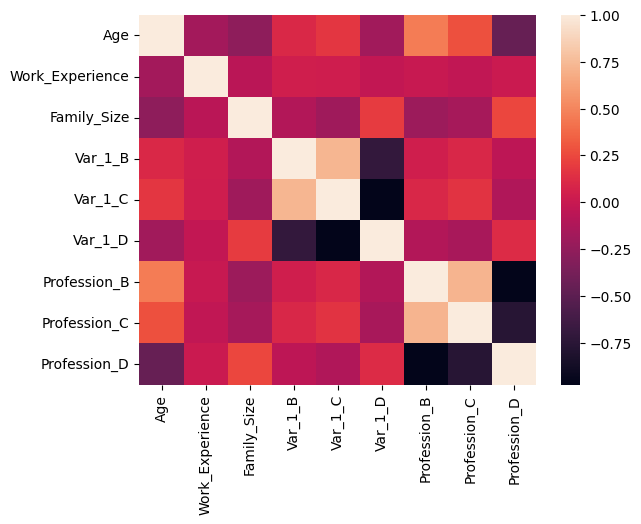

In [23]:
sns.heatmap(X_train.select_dtypes(include=np.number).corr())

In [24]:
ct = ColumnTransformer(
    (

        ('ohe', OneHotEncoder(), categorical_features),
        ('scaler', StandardScaler(), numeric_features)
    )
)

one_vs_one_pipe = Pipeline(
    (
        ('transformation', ct),
        ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier()))
    )
)

param_grid = {
    'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber', 
                                    'squared_hinge', 'perceptron'],
    
    'one_vs_one__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 10]
}

searcher = GridSearchCV(one_vs_one_pipe, param_grid=param_grid)
searcher.fit(X_train, y_train);


In [25]:
one_vs_one_pipe.set_params(**searcher.best_params_)
one_vs_one_pipe.fit(X_train, y_train);

In [26]:
np.mean(one_vs_one_pipe.predict(X_val) == y_val).round(4)

np.float64(0.4498)

In [27]:
one_vs_rest_pipe = Pipeline(
    (
        ('transformation', ct),
        ('one_vs_rest', OneVsRestClassifier(estimator=SGDClassifier()))
    )
)

param_grid = {
    'one_vs_rest__estimator__loss': ['hinge', 'log', 'modified_huber', 
                                    'squared_hinge', 'perceptron'],
    
    'one_vs_rest__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'one_vs_rest__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 10]
}

searcher = GridSearchCV(one_vs_rest_pipe, param_grid=param_grid)
searcher.fit(X_train, y_train);

In [28]:
one_vs_rest_pipe.set_params(**searcher.best_params_)
one_vs_rest_pipe.fit(X_train, y_train);
np.mean(one_vs_rest_pipe.predict(X_val) == y_val).round(4)

np.float64(0.4647)

In [29]:
logreg_pipe = Pipeline(
    (
        ('transformation', ct),
        ('logreg', LogisticRegression(multi_class='multinomial'))
    )
)

param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    
    'logreg__C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 10]
}

searcher = GridSearchCV(logreg_pipe, param_grid=param_grid)
searcher.fit(X_train, y_train);

In [30]:
logreg_pipe.set_params(**searcher.best_params_)
logreg_pipe.fit(X_train, y_train);
np.mean(logreg_pipe.predict(X_val) == y_val).round(4)

np.float64(0.4659)

In [31]:
test_target = pd.read_csv(r'../data/segmentation/sample_submission.csv')
test_target.head(2)

,ID,Segmentation
0,458989,A
1,458994,A


In [32]:
test = pd.merge(X_test, test_target, how='inner', on='ID').drop(columns='ID')
X_test = test.drop(columns='Segmentation')
y_test = test.Segmentation

In [33]:
np.mean(one_vs_one_pipe.predict(X_test) == y_test).round(4), \
np.mean(one_vs_rest_pipe.predict(X_test) == y_test).round(4), \
np.mean(logreg_pipe.predict(X_test) == y_test).round(4), 


(np.float64(0.2067), np.float64(0.1195), np.float64(0.2478))

In [34]:
y_test.value_counts()

Segmentation
A    2627
Name: count, dtype: int64

In [35]:
y_val.value_counts()

Segmentation
D    228
C    217
A    194
B    168
Name: count, dtype: int64